## Preface

Start with two column vectors $a_1$ and $a_2$. They can have three components each, so they correspond to points in 3-dimensional space. The picture needs a center point which locates the zero vector:

$$
a_1=\begin{bmatrix}2\\3\\1\end{bmatrix},\qquad
a_2=\begin{bmatrix}1\\4\\2\end{bmatrix},\qquad
\text{zero vector}=\begin{bmatrix}0\\0\\0\end{bmatrix}
$$


The vectors are drawn on this 2-dimensional page. But we all have practice in visualizing three-dimensional pictures. Here are $a_1,a_2,2a_1$, and the vector sum $a_1+a_2$.

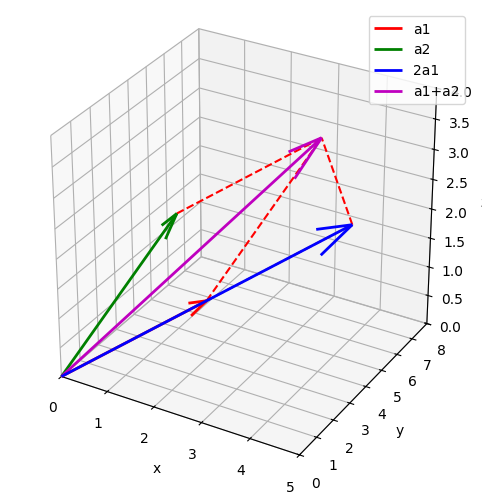

In [5]:
# Plot 3D vectors a1, a2, 2a1, and a1+a2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- define vectors ---
a1 = np.array([2, 3, 1])  # a1
a2 = np.array([1, 4, 2])  # a2
v3 = 2 * a1               # 2a1
v4 = a1 + a2              # a1 + a2 (vector sum)

vectors = {'a1': a1, 'a2': a2, '2a1': v3, 'a1+a2': v4}
colors = {'a1':'r', 'a2':'g', '2a1':'b', 'a1+a2':'m'}

# --- create figure and axes ---
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# --- draw vectors from origin using quiver ---
for name, vec in vectors.items():
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2],
              color=colors[name], arrow_length_ratio=0.12, linewidth=2, label=name)

# --- set axis labels and limits ---
pad = 1
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(0, max(a1[0], a2[0], v3[0], v4[0]) + pad)
ax.set_ylim(0, max(a1[1], a2[1], v3[1], v4[1]) + pad)
ax.set_zlim(0, max(a1[2], a2[2], v3[2], v4[2]) + pad)
ax.legend()

# --- dashed guide lines showing parallelogram for the vector sum ---
# from tip of a1 to tip of a1 + a2
ax.plot([a1[0], v4[0]], [a1[1], v4[1]], [a1[2], v4[2]], linestyle='--', color='r')
# from tip of a2 to tip of a1 + a2
ax.plot([a2[0], v4[0]], [a2[1], v4[1]], [a2[2], v4[2]], linestyle='--', color='r')
# from tip of 2a1 to tip of a1 + a2 (completes parallelogram)
ax.plot([v3[0], v4[0]], [v3[1], v4[1]], [v3[2], v4[2]], linestyle='--', color='r')
# optional: connect tip of a1 to tip of 2a1 to illustrate scaling
ax.plot([a1[0], v3[0]], [a1[1], v3[1]], [a1[2], v3[2]], linestyle='--', color='r')

# --- finalize and show ---
ax.set_box_aspect([1,1,1])
plt.show()

That picture illustrated two basic operations—adding vectors $a_1+a_2$ and multiplying a vector by $2$. Combining those operations produced a "linear combination" $2a_1+a_2$:

$$\boxed{\text{Linear combination} = c\,a_1 + d\,a_2 \quad \text{for any scalars } c,d}$$

Eventually we want all vectors $ca_1+da_2$:

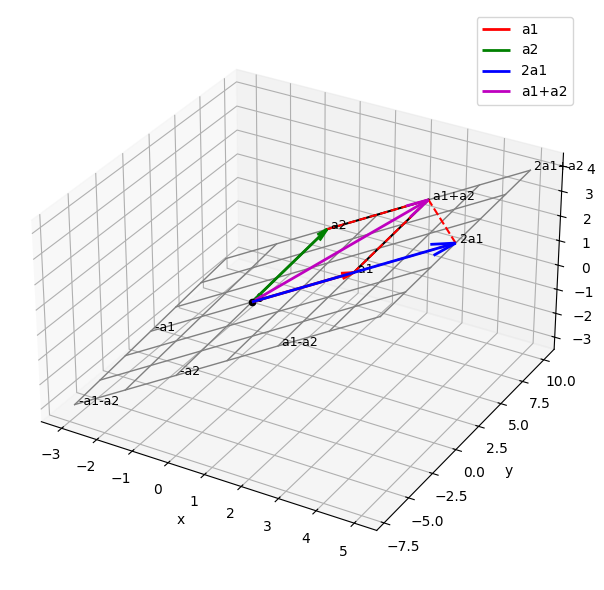

In [6]:
# Parallelogram lattice: plot lines for s*a1 + t*a2 and label key points
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# base vectors (same as above)
a1 = np.array([2, 3, 1])
a2 = np.array([1, 4, 2])

# parameter ranges for the lattice (s along a1, t along a2)
s_vals = np.linspace(-1, 2, 7)
t_vals = np.linspace(-1, 1, 7)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

# draw grid lines: for each fixed s, vary t; for each fixed t, vary s
for s in s_vals:
    pts = np.array([s*a1 + t*a2 for t in t_vals])
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='gray', linewidth=1)
for t in t_vals:
    pts = np.array([s*a1 + t*a2 for s in s_vals])
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='gray', linewidth=1)

# highlight central parallelogram edges (s=0..1, t=0..1)
s0 = np.linspace(0,1,2)
t0 = np.linspace(0,1,2)
for s in s0:
    pts = np.array([s*a1 + t*a2 for t in t0])
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='k', linewidth=1.5)
for t in t0:
    pts = np.array([s*a1 + t*a2 for s in s0])
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='k', linewidth=1.5)

# draw main vectors from origin
vectors = {'a1': a1, 'a2': a2, '2a1': 2*a1, 'a1+a2': a1 + a2}
colors = {'a1':'r', 'a2':'g', '2a1':'b', 'a1+a2':'m'}
for name, vec in vectors.items():
    ax.quiver(0,0,0, vec[0], vec[1], vec[2], color=colors[name],
              arrow_length_ratio=0.12, linewidth=2, label=name)

# dashed guide lines for parallelogram (connecting tips)
v3 = 2*a1
v4 = a1 + a2
ax.plot([a1[0], v4[0]], [a1[1], v4[1]], [a1[2], v4[2]], linestyle='--', color='r')
ax.plot([a2[0], v4[0]], [a2[1], v4[1]], [a2[2], v4[2]], linestyle='--', color='r')
ax.plot([v3[0], v4[0]], [v3[1], v4[1]], [v3[2], v4[2]], linestyle='--', color='r')
ax.plot([a1[0], v3[0]], [a1[1], v3[1]], [a1[2], v3[2]], linestyle='--', color='r')

# mark and label selected lattice points
labels = {
    '0': np.array([0,0,0]),
    '-a1-a2': -a1 - a2,
    '-a1': -a1,
    '-a2': -a2,
    'a1-a2': a1 - a2,
    'a1': a1,
    'a2': a2,
    'a1+a2': a1 + a2,
    '2a1': 2*a1,
    '2a1+a2': 2*a1 + a2
}
for txt, pt in labels.items():
    ax.scatter(pt[0], pt[1], pt[2], color='k' if txt=='0' else 'none', s=20)
    ax.text(pt[0], pt[1], pt[2], ' '+txt, fontsize=9)

# appearance tweaks
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc='upper right')
ax.set_box_aspect([1,1,0.6])
plt.tight_layout()
plt.show()

Here is the key ! The combinations $ca_1+da_2$ fill a whole plane. It is an infinite plane in 3-dimensional space. By using more and more fractions and decimals $c$ and $d$, we fill in a complete plane. Every point on the plane is a combination of $a_1$ and $a_2$.

Now comes a fundamental idea in linear algebra: a matrix. The matrix $A$ holds $n$ columns vectors $a_1,...,a_n$. At this point our matrix has two columns $a_1$ and $a_2$ and those are vectors in 3-dimensional space. So the matrix has three rows and two columns.


$3$ by $2$ matrix $m=3$ rows and $n=2$ columns:

$$
\boxed{\displaystyle A = [a_1\ a_2] = \begin{bmatrix}2 & 1\\ 3 & 4\\ 1 & 2\end{bmatrix}}
$$





The combinations of those two columns produced a plane in three-dimensional space. There is a natural name for that plane. It is the column space of the matrix. For any $A$, the column space of $A$ contains all combinations of the columns. Here are the four ideas introduced so far. You will see them all in Chapter 1.

1. Column vectors $a_1$ and $a_2$, in three dimensions
2. Linear combinations $ca_1 + da_2$ of those vectors
3. The matrix $A$ contains the columns $a_1$ and $a_2$
4. Column space of the matrix = all linear combinations of the columns = plane

Now we include 2 more columns in $A$

The 4 columns are in 3-dimensional space

$A=\begin{bmatrix}2 & 1 & 3 & 0\\ 3 & 4 & 7 & 0\\ 1 & 2 & 3 & -1\end{bmatrix}$

Linear algebra aims for an understanding of every column space. Let me try this one.
- Columns 1 and 2 produce the same plane as before (same $a_1$ and $a_2$)
- Column 3 contributes nothing new because a3 is on that plane: $a_3 = a_1 + a_2$
- Column 4 is not on the plane: Adding in $c_4a_4$ raises or lowers the plane
- The column space of this matrix $A$ is the whole 3-dimensional space : all points !

